In [14]:
# Purpose: Plot first 5 lowest eigenvalues and compare ground state wavefunctions for different parameter sweeps
# For each parameter sweep, plot 3 subplots side by side for λ = 0, 0.5, 1.5
#   1. For fixed nq=4, plot psi vs x for varying xmax = 0.5, 4, 7, 11, 16, 22 (all curves in one subplot)
#   2. For fixed nq=1, 3, 7, 9, plot psi vs x for varying xmax as above (one row per nq, 3 subplots per row)
#   3. For fixed xmax=0.5, 7, 11, 16, 22, plot psi vs x for varying nq = 1, 3, 6, 9 (all curves in one subplot)
# Also print first 5 eigenvalues for each λ for nq=4, xmax=4

import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt

def jlp_grid(nq, xmax):
    N = 2**nq
    dx = 2 * xmax / N
    x = np.linspace(-xmax + dx/2, xmax - dx/2, N)
    return x, dx

def dft_matrix(N):
    n = np.arange(N)
    m = np.arange(N)
    omega = np.exp(-2j * np.pi / N)
    F = np.power(omega, np.outer(n, m)) / np.sqrt(N)
    return F

def momentum_grid(N, xmax):
    # Half-shifted momentum grid
    p = (2 * np.pi / (2 * xmax)) * np.fft.fftshift(np.arange(-N//2, N//2))
    return p

def build_hamiltonian(nq, xmax, lam=0.0, omega=1.0):
    N = 2**nq
    x, dx = jlp_grid(nq, xmax)
    p = momentum_grid(N, xmax)
    F = dft_matrix(N)
    # Position operator
    X = np.diag(x)
    # Momentum operator (spectral)
    P = F.conj().T @ np.diag(p) @ F
    # Kinetic energy
    H_kin = 0.5 * (P @ P)
    # Potential energy
    V_harm = 0.5 * (omega**2) * (X @ X)
    V_anh = (lam / 4.0) * (X @ X @ X @ X)
    V = V_harm + V_anh
    H = H_kin + V
    # Symmetrize to avoid numerical asymmetry
    H = 0.5 * (H + H.conj().T)
    return H, x, dx

def exact_spectrum(H, nev=5):
    w, v = sla.eigh(H)
    return w[:nev], v[:, :nev]

def normalize_wavefunction(psi, dx):
    norm = np.sqrt(np.sum(np.abs(psi)**2) * dx)
    return psi / norm if norm != 0 else psi

def plot_wavefunctions_vary_xmax_side_by_side(nq, xmax_list, lam_list, nev=5):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for idx, lam in enumerate(lam_list):
        for xmax in xmax_list:
            H, x, dx = build_hamiltonian(nq, xmax, lam)
            _, evecs = exact_spectrum(H, nev=nev)
            psi = evecs[:, 0]
            psi = normalize_wavefunction(psi, dx)
            axes[idx].plot(x, np.real(psi), label=f"xmax={xmax}")
        axes[idx].set_xlabel('x')
        axes[idx].set_ylabel('ψ₀(x)')
        axes[idx].set_title(f'nq={nq}, λ={lam}')
        axes[idx].legend()
        axes[idx].grid(True)
    fig.suptitle(f'Ground State, nq={nq}, varying xmax')
    plt.tight_layout()
    plt.show()

def plot_wavefunctions_vary_nq_side_by_side(nq_list, xmax, lam_list, nev=5):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for idx, lam in enumerate(lam_list):
        for nq in nq_list:
            H, x, dx = build_hamiltonian(nq, xmax, lam)
            _, evecs = exact_spectrum(H, nev=nev)
            psi = evecs[:, 0]
            psi = normalize_wavefunction(psi, dx)
            axes[idx].plot(x, np.real(psi), label=f"nq={nq}")
        axes[idx].set_xlabel('x')
        axes[idx].set_ylabel('ψ₀(x)')
        axes[idx].set_title(f'xmax={xmax}, λ={lam}')
        axes[idx].legend()
        axes[idx].grid(True)
    fig.suptitle(f'Ground State, xmax={xmax}, varying nq')
    plt.tight_layout()
    plt.show()

def plot_all():
    lam_list = [0.0, 0.5, 1.5]
    xmax_list = [0.5, 4, 7, 11, 16, 22]
    nq_list = [1, 3, 7, 9]
    # 1. For fixed nq=4, vary xmax, 3 subplots for λ
    plot_wavefunctions_vary_xmax_side_by_side(4, xmax_list, lam_list)
    # 2. For fixed nq=1,3,7,9, vary xmax, 3 subplots for λ each
    for nq in nq_list:
        plot_wavefunctions_vary_xmax_side_by_side(nq, xmax_list, lam_list)
    # 3. For fixed xmax=0.5, 7, 11, 16, 22, vary nq, 3 subplots for λ each
    nq_list2 = [1, 3, 6, 9]
    for xmax in [0.5, 7, 11, 16, 22]:
        plot_wavefunctions_vary_nq_side_by_side(nq_list2, xmax, lam_list)
    # Print first 5 eigenvalues for nq=4, xmax=4, all λ
    for lam in lam_list:
        H, _, _ = build_hamiltonian(4, 4, lam)
        evals, _ = exact_spectrum(H, nev=5)
        print(f'First 5 eigenvalues for nq=4, xmax=4, λ={lam}:', evals)



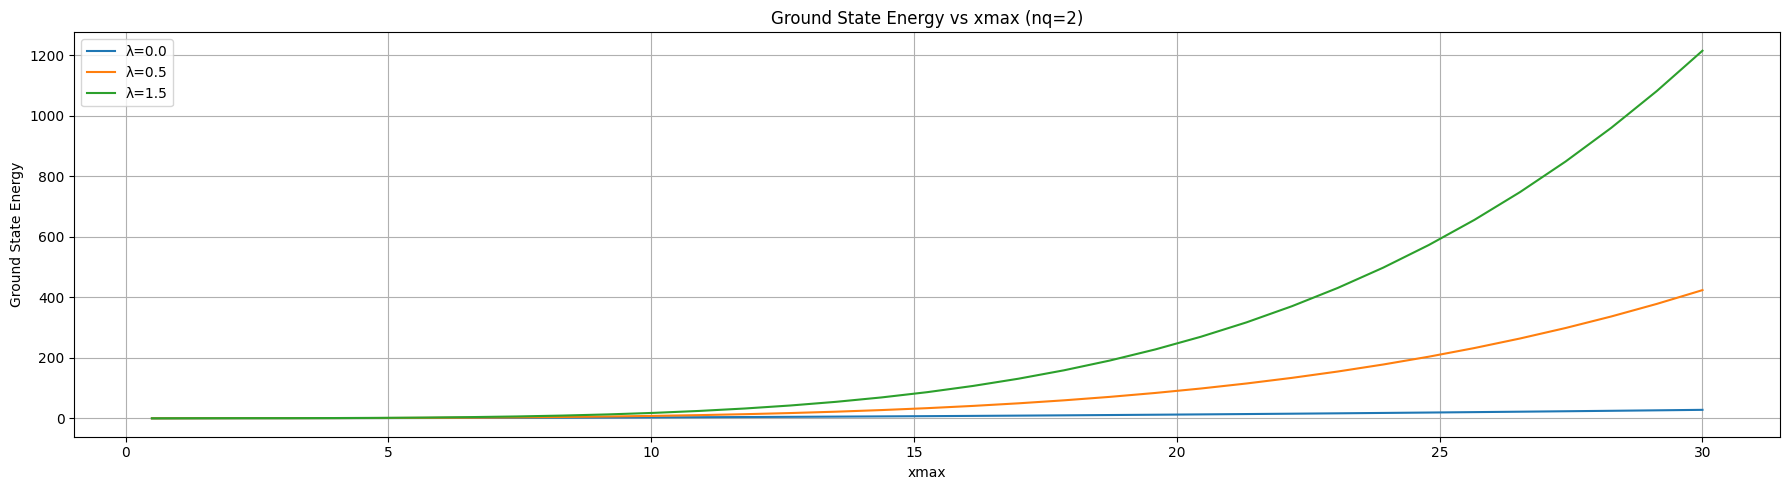

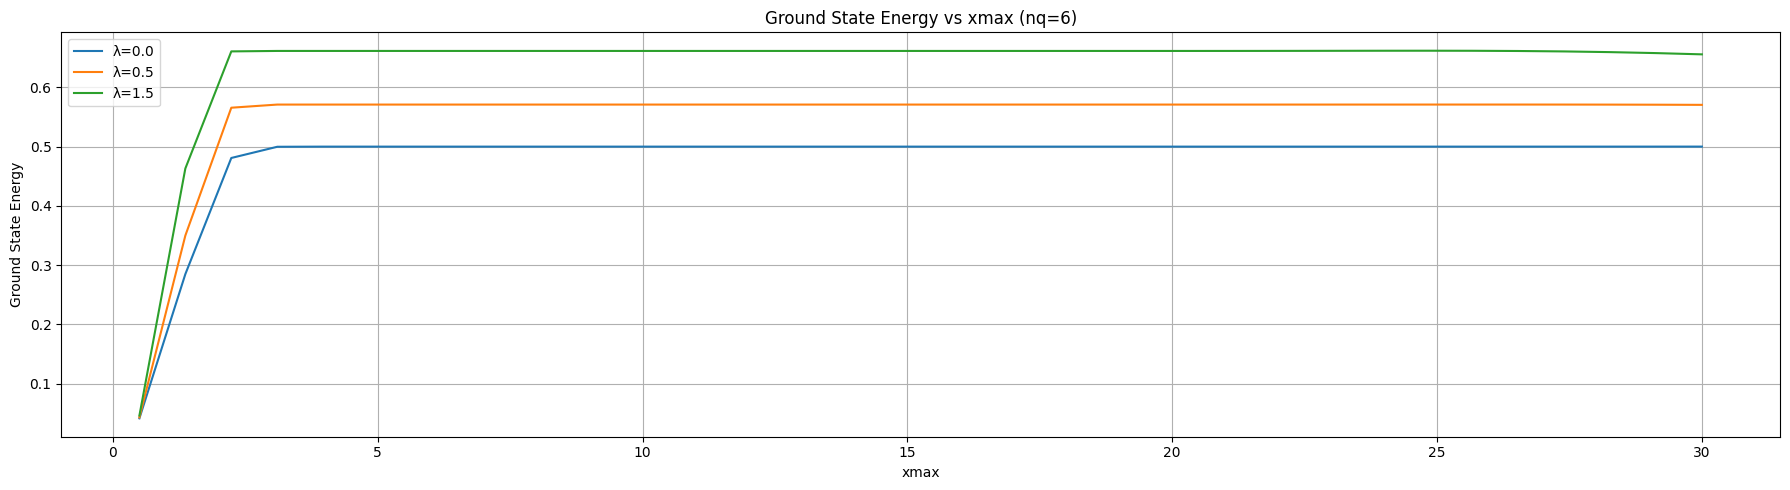

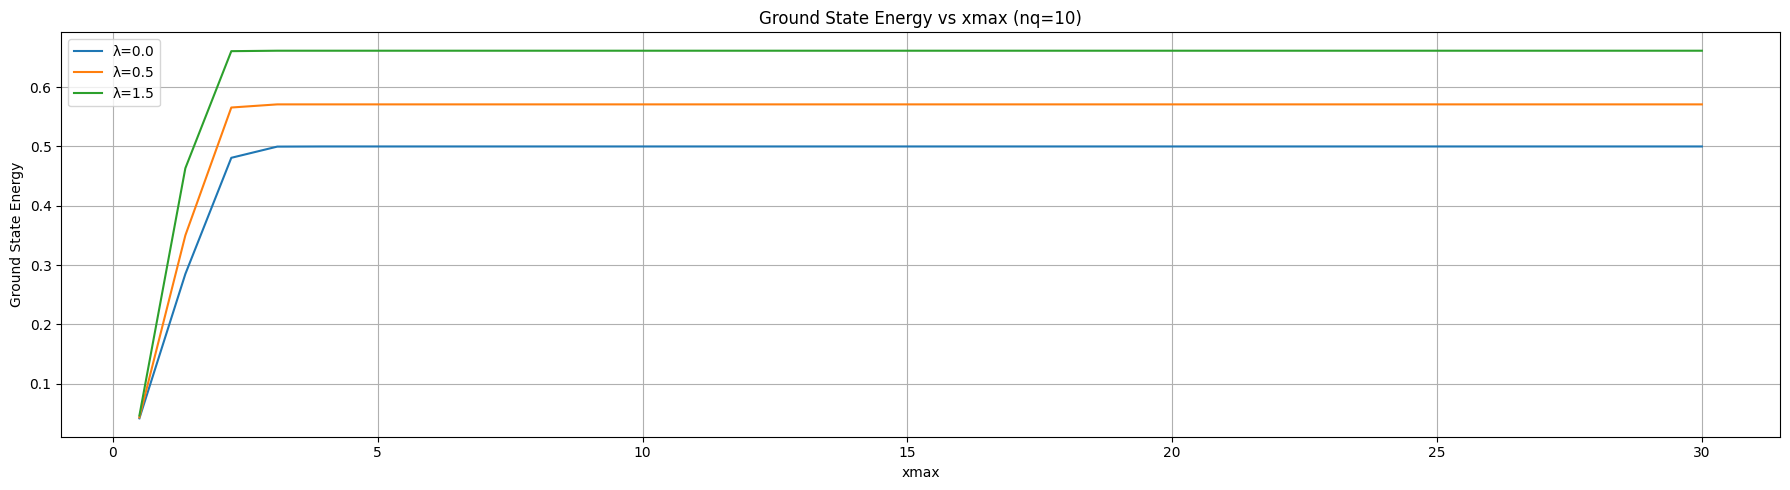

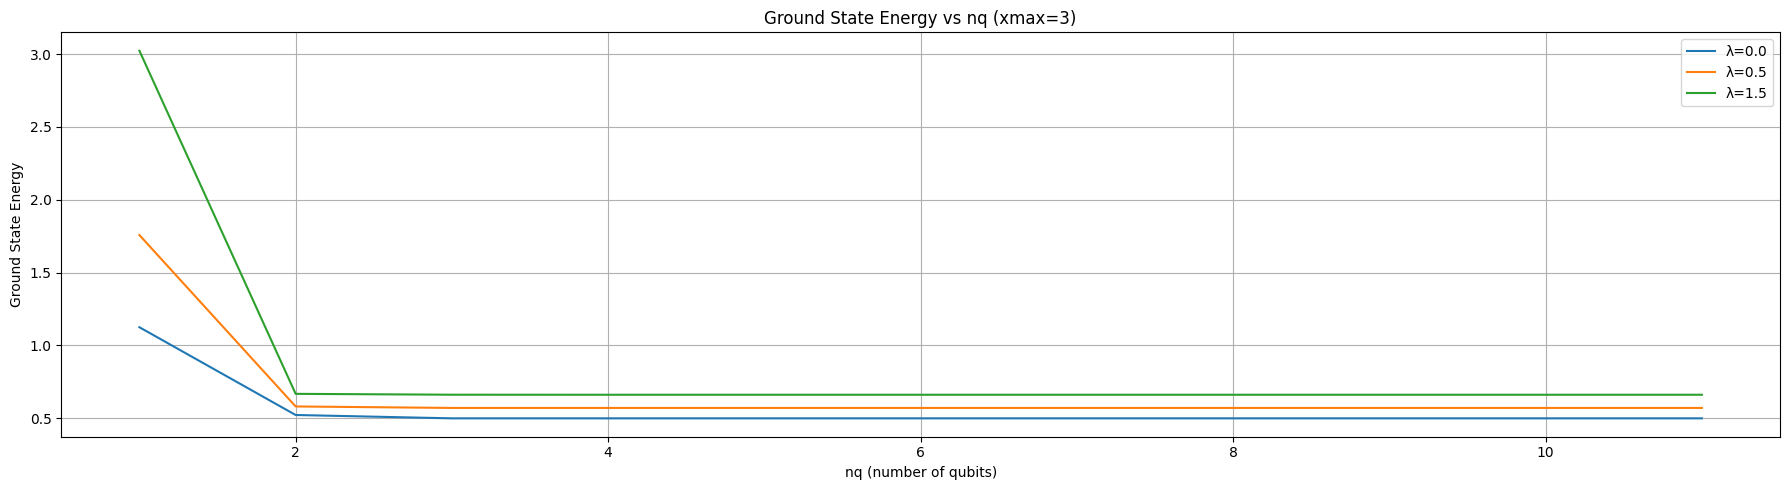

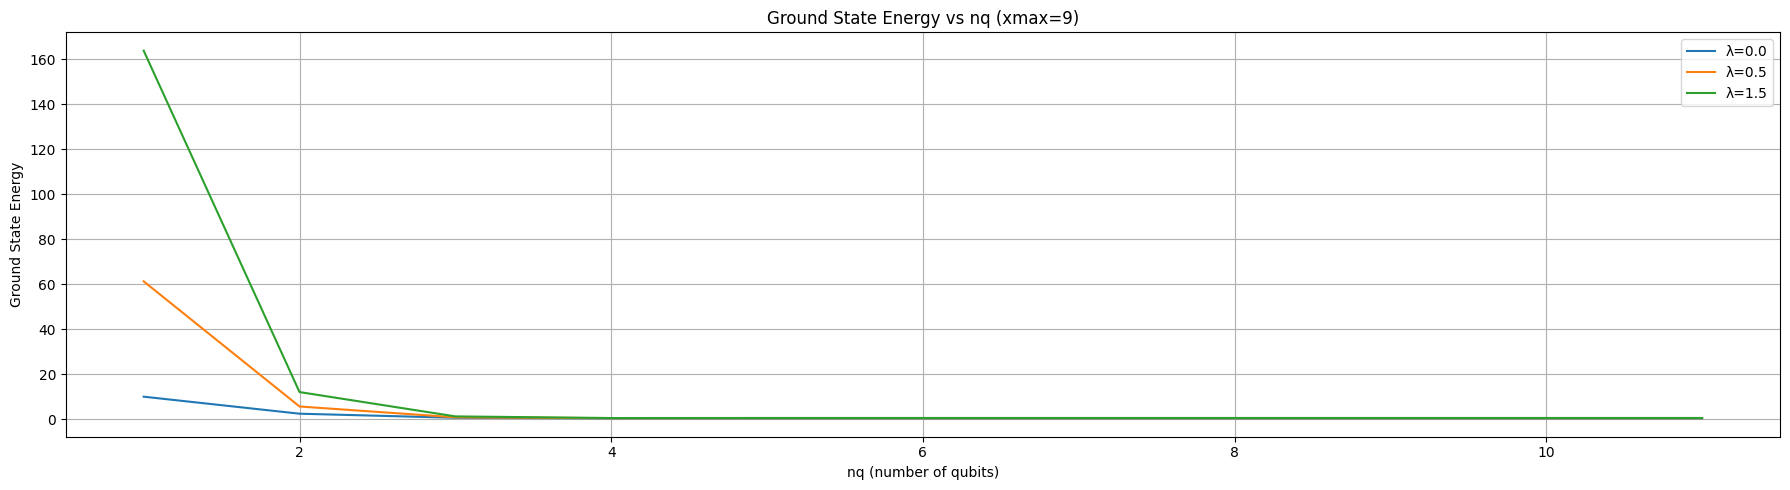

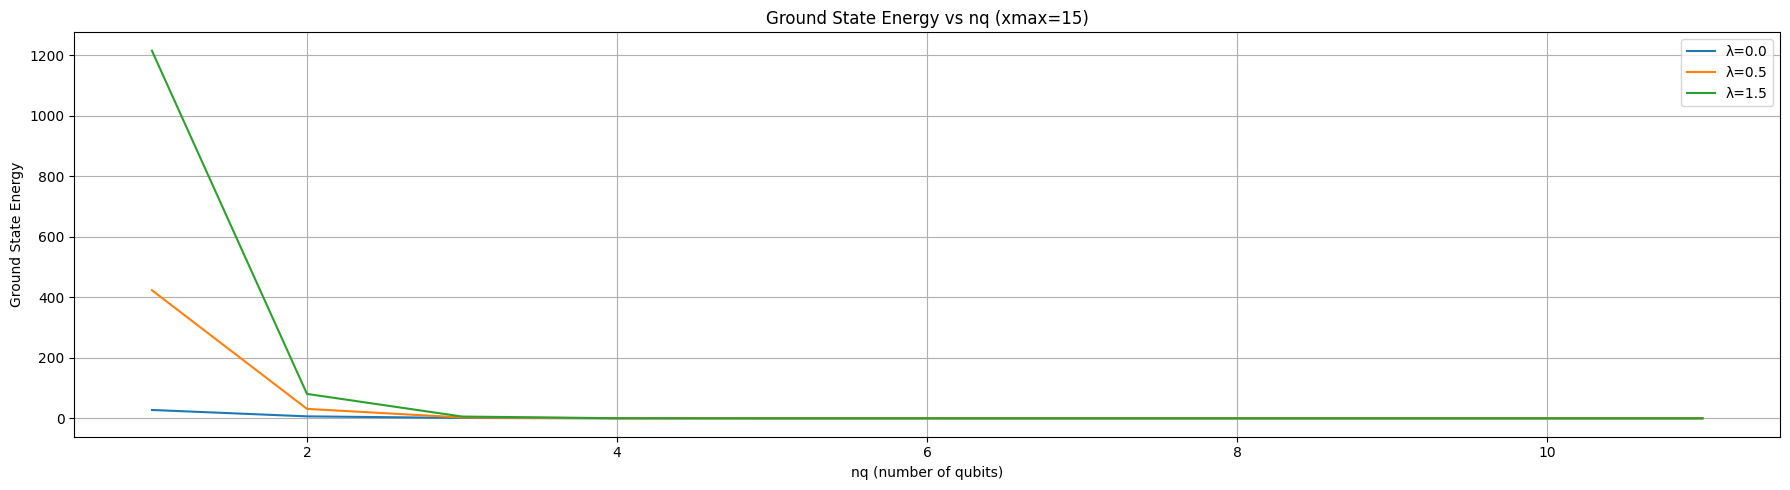

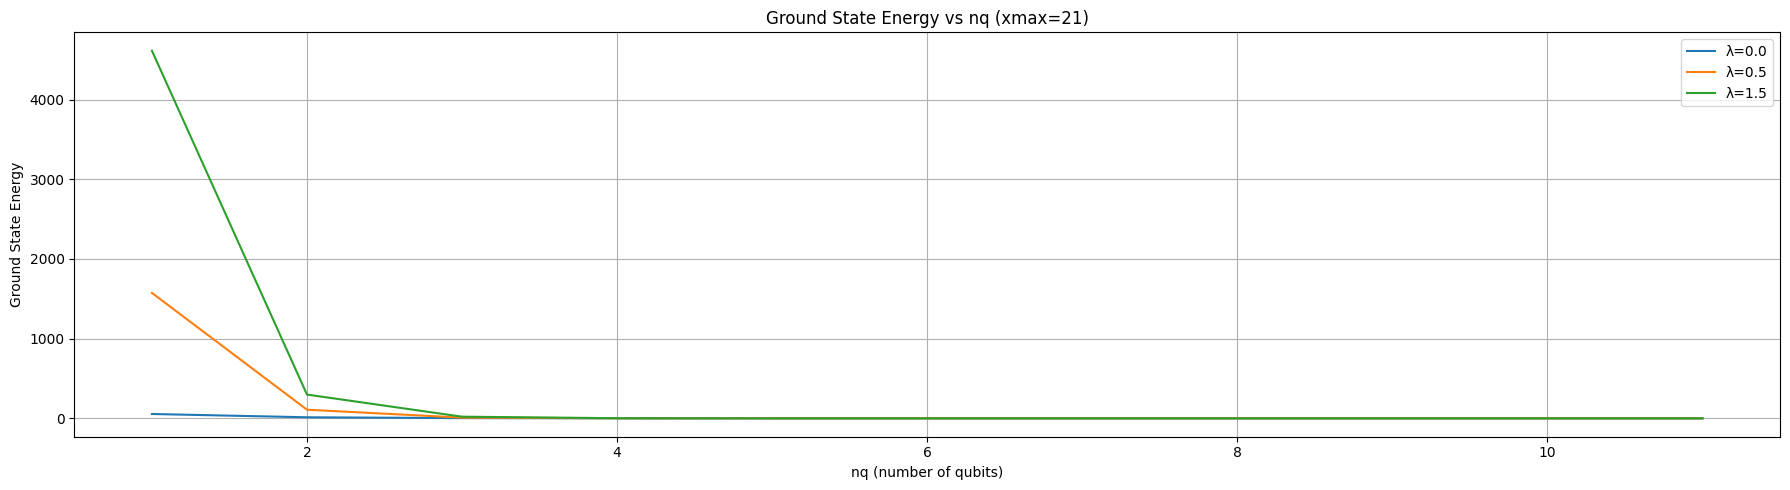

In [15]:
# ==============================================
# Plot eigenvalue convergence for the same parameter sweeps as wavefunction plots
# ==============================================

import matplotlib.pyplot as plt

def plot_eigen_convergence_wavefunction_sweeps():
    lam_list = [0.0, 0.5, 1.5]
    # 1. For fixed nq = 2, 6, 10, vary xmax from 0.5 to 30
    nq_values = [2, 6, 10]
    xmax_range = np.linspace(0.5, 30, 35)
    for nq in nq_values:
        plt.figure(figsize=(18, 5))
        for idx, lam in enumerate(lam_list):
            evals_list = []
            for xmax in xmax_range:
                H, _, _ = build_hamiltonian(nq, xmax, lam)
                evals, _ = exact_spectrum(H, nev=3)
                evals_list.append(evals[0])  # ground state
            plt.plot(xmax_range, evals_list, label=f'λ={lam}')
        plt.xlabel('xmax')
        plt.ylabel('Ground State Energy')
        plt.title(f'Ground State Energy vs xmax (nq={nq})')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    # 2. For fixed xmax = 3, 9, 15, 21, vary nq from 1 to 11
    xmax_values = [3, 9, 15, 21]
    nq_range = range(1, 12)
    for xmax in xmax_values:
        plt.figure(figsize=(18, 5))
        for idx, lam in enumerate(lam_list):
            evals_list = []
            for nq in nq_range:
                H, _, _ = build_hamiltonian(nq, xmax, lam)
                evals, _ = exact_spectrum(H, nev=3)
                evals_list.append(evals[0])  # ground state
            plt.plot(list(nq_range), evals_list, label=f'λ={lam}')
        plt.xlabel('nq (number of qubits)')
        plt.ylabel('Ground State Energy')
        plt.title(f'Ground State Energy vs nq (xmax={xmax})')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Run the eigenvalue plots for the same sweeps as wavefunction plots
plot_eigen_convergence_wavefunction_sweeps()



=== Plotting k=0: vary xmax at fixed nq=4 ===


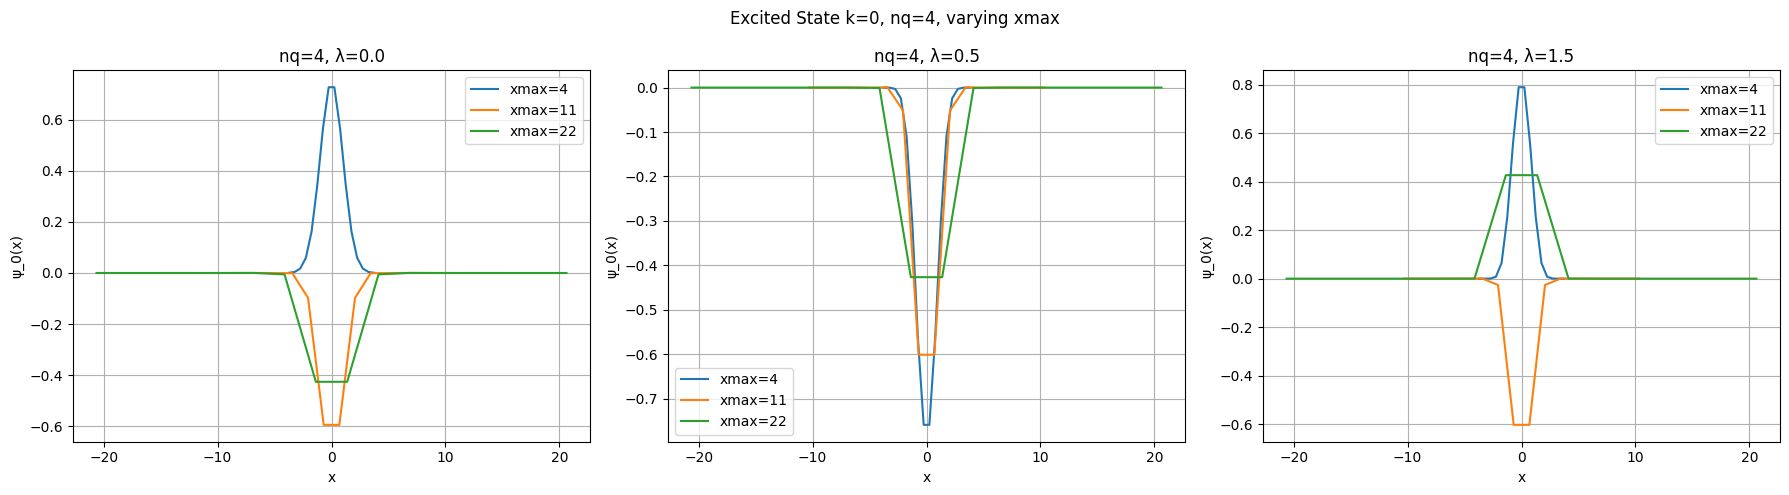


=== Plotting k=0: vary nq at fixed xmax=7 ===


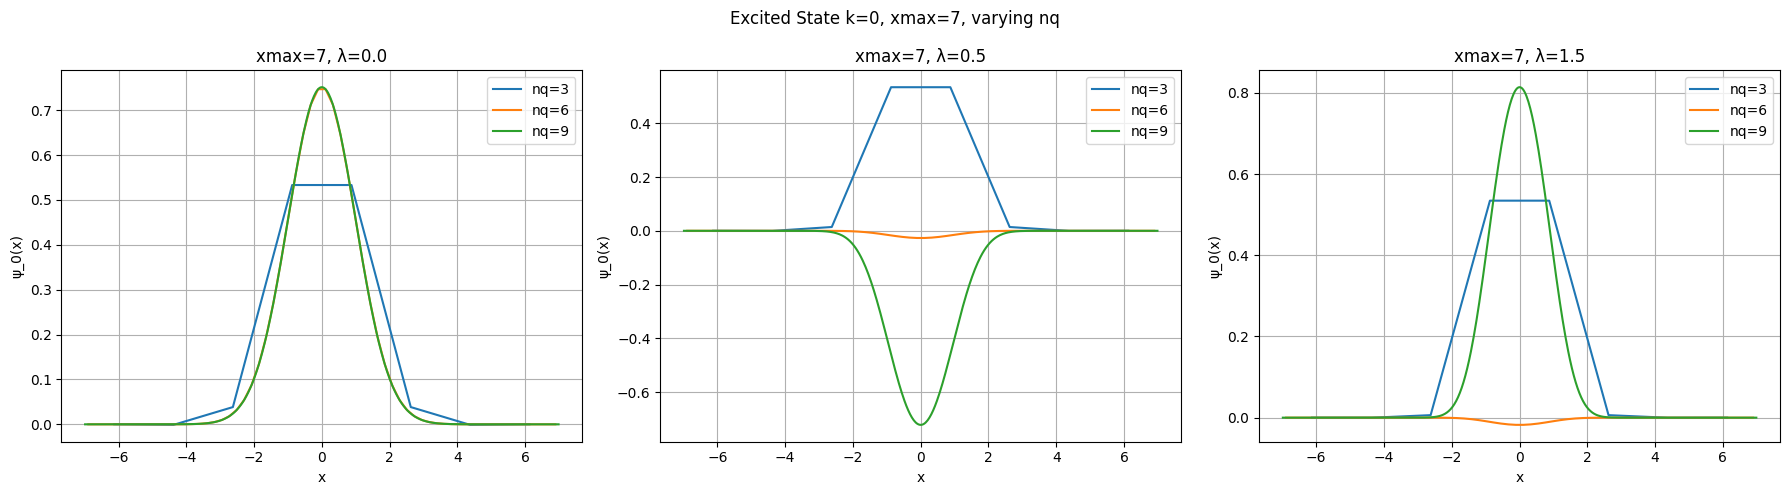


=== Plotting k=1: vary xmax at fixed nq=4 ===


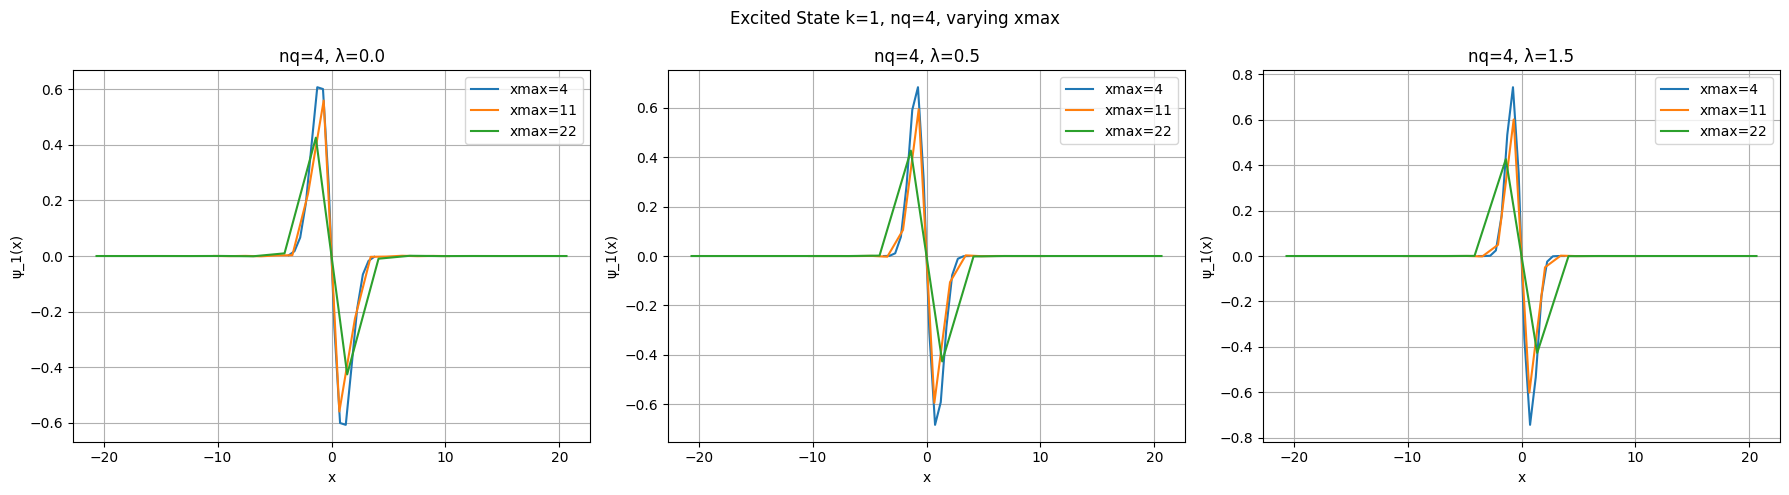


=== Plotting k=1: vary nq at fixed xmax=7 ===


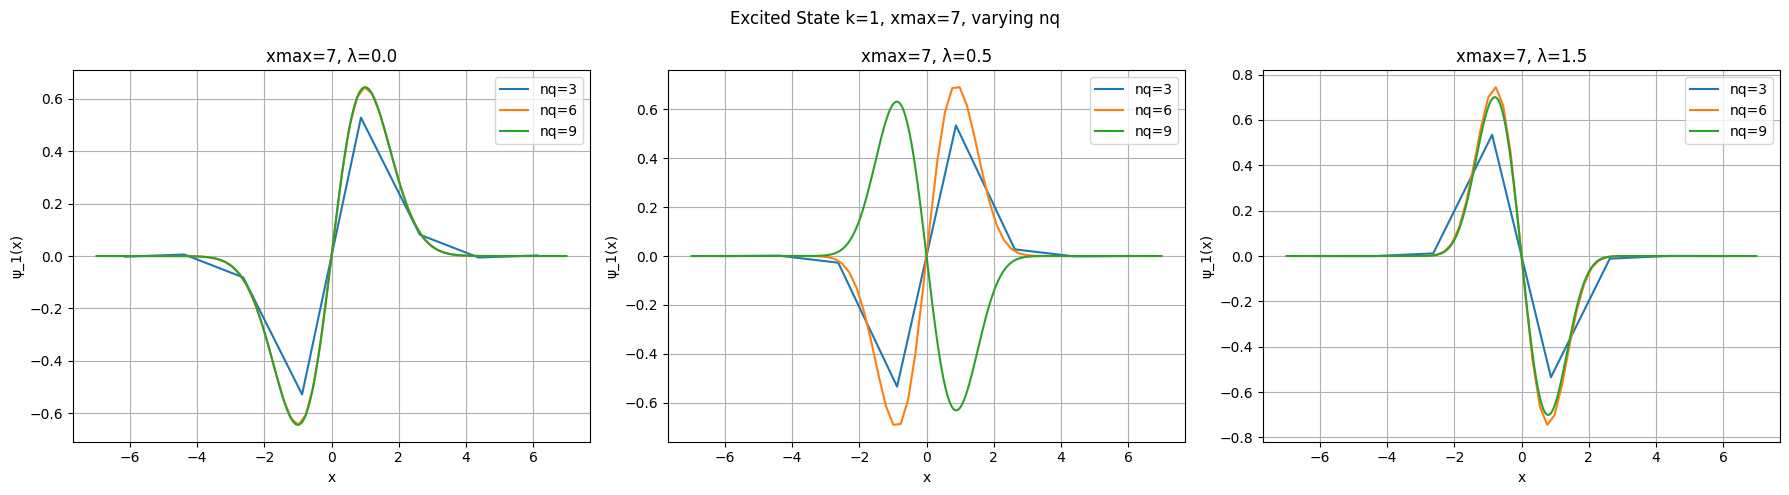


=== Plotting k=2: vary xmax at fixed nq=4 ===


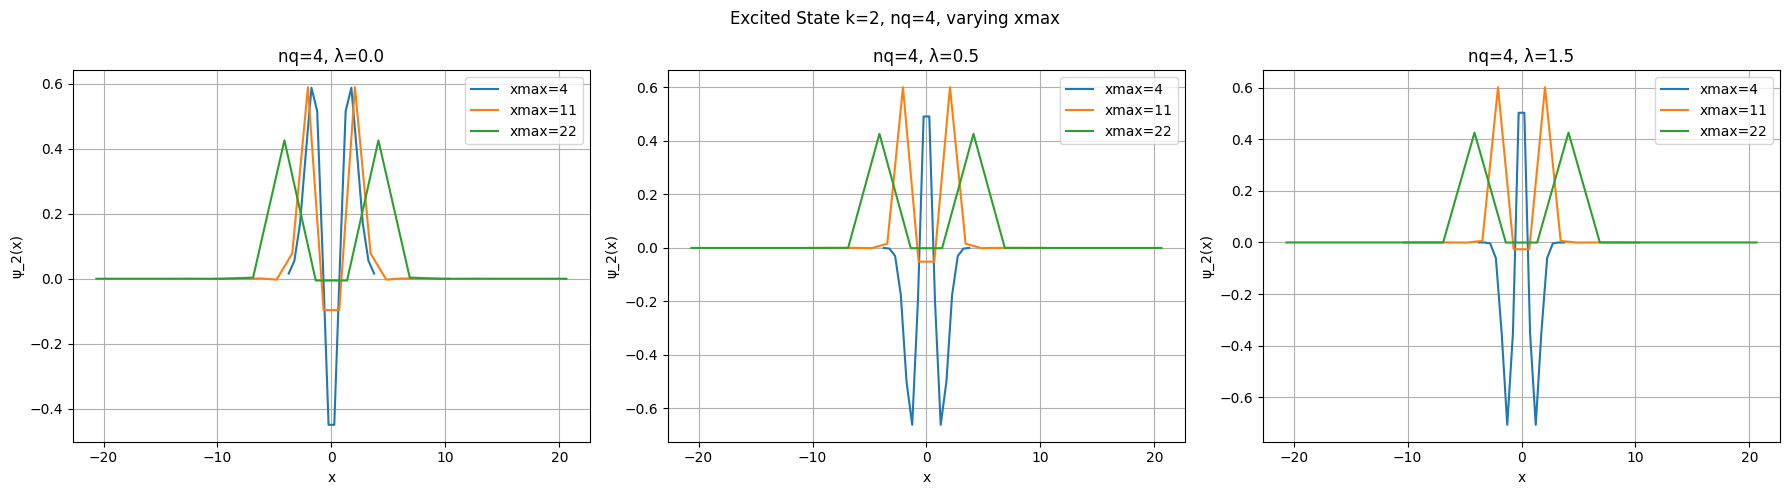


=== Plotting k=2: vary nq at fixed xmax=7 ===


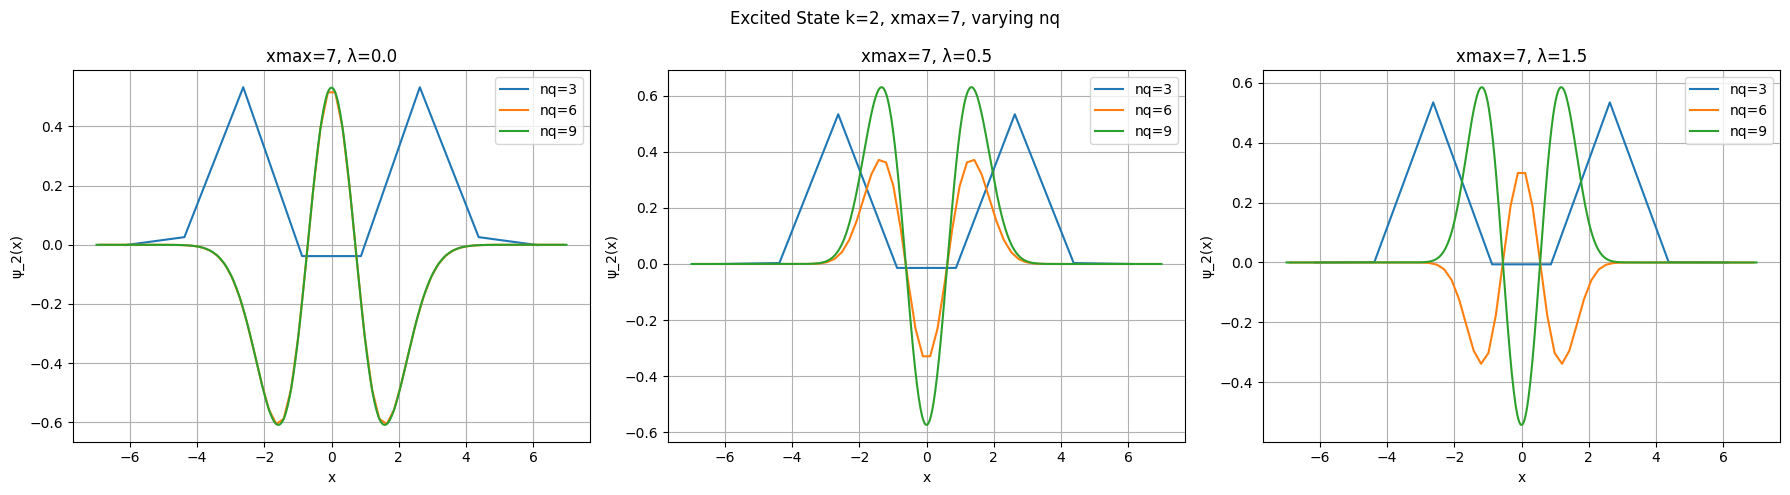


=== Plotting k=3: vary xmax at fixed nq=4 ===


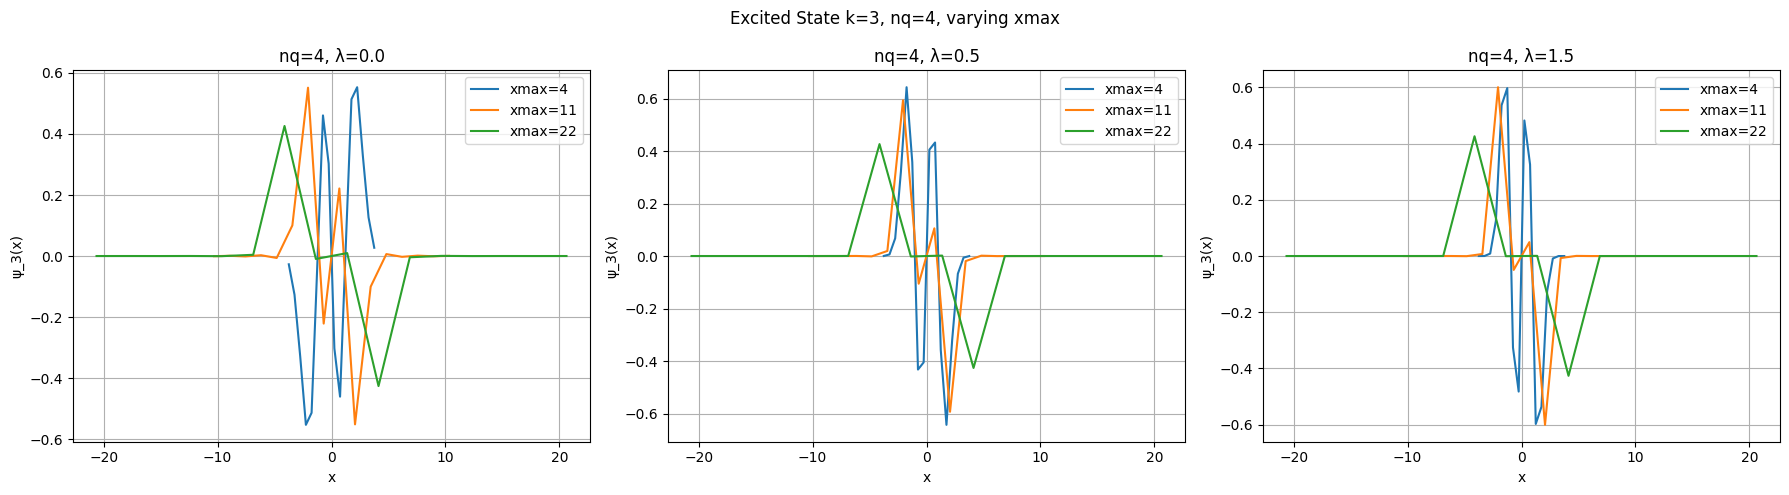


=== Plotting k=3: vary nq at fixed xmax=7 ===


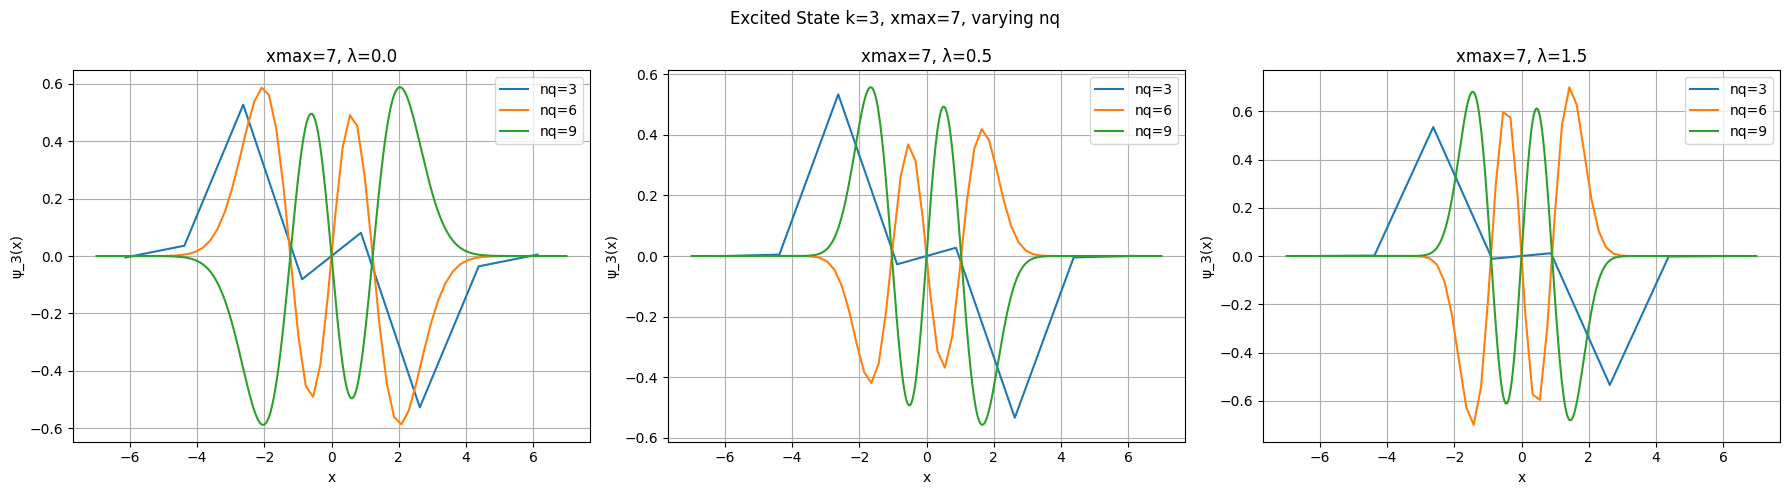


=== Plotting k=4: vary xmax at fixed nq=4 ===


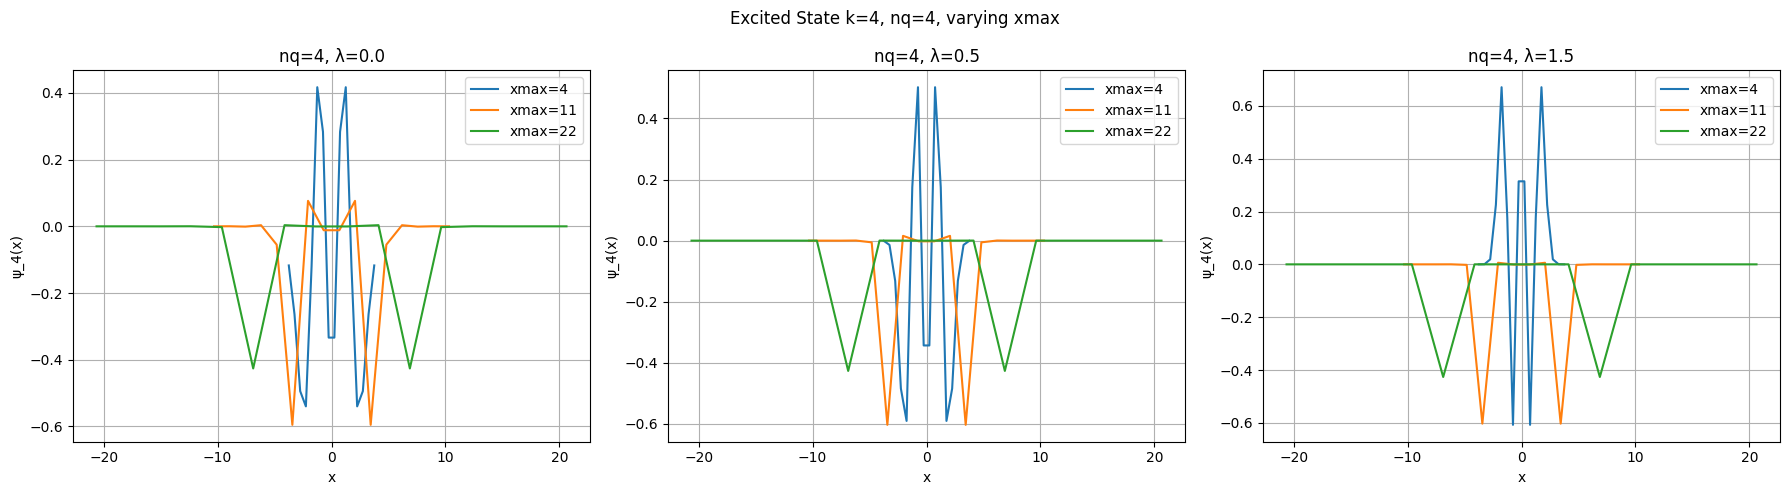


=== Plotting k=4: vary nq at fixed xmax=7 ===


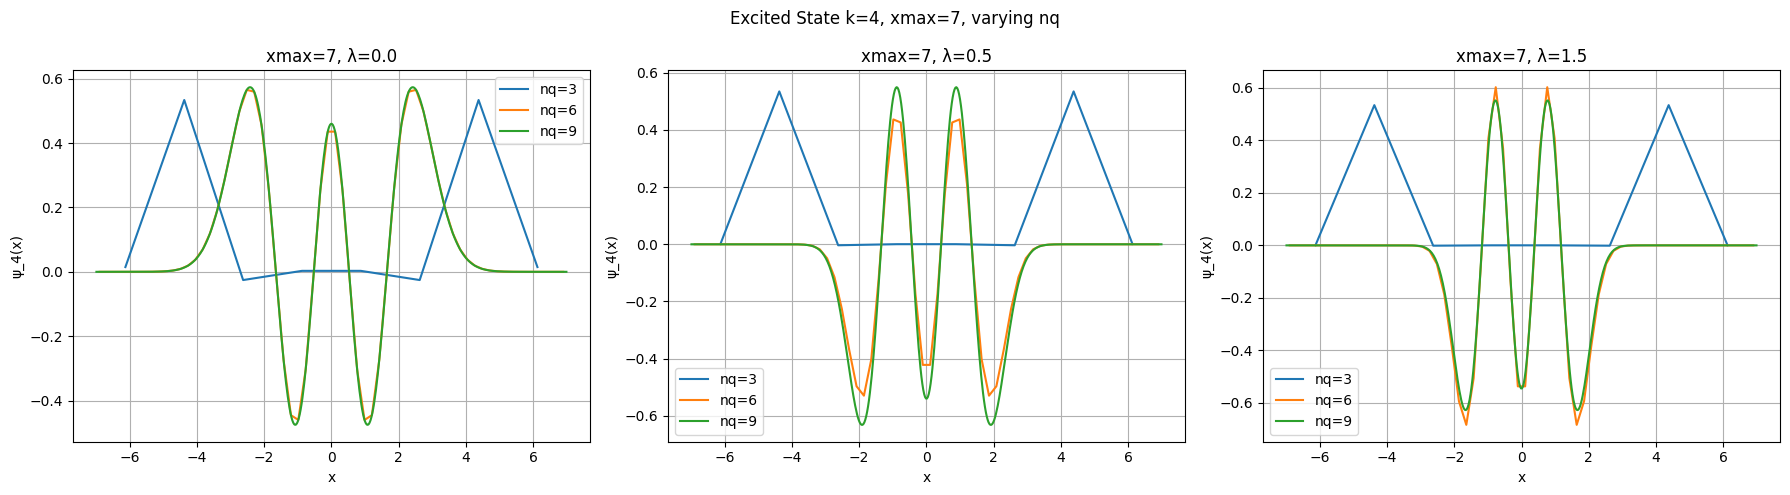

In [17]:
# Generate wavefunction plots for k = 0..4 across λ, varying xmax and nq (quick sweep)
lam_list = [0.0, 0.5, 1.5]
# modest sweeps to keep runtime reasonable
xmax_list = [4, 11, 22]
nq_list = [3, 6, 9]
fixed_nq = 4
fixed_xmax = 7

for k in range(5):
    print(f"\n=== Plotting k={k}: vary xmax at fixed nq={fixed_nq} ===")
    plot_excited_wavefunctions_vary_xmax_side_by_side(
        nq=fixed_nq,
        xmax_list=xmax_list,
        lam_list=lam_list,
        k=k,
        nev=max(6, k+2)
    )
    print(f"\n=== Plotting k={k}: vary nq at fixed xmax={fixed_xmax} ===")
    plot_excited_wavefunctions_vary_nq_side_by_side(
        nq_list=nq_list,
        xmax=fixed_xmax,
        lam_list=lam_list,
        k=k,
        nev=max(6, k+2)
    )

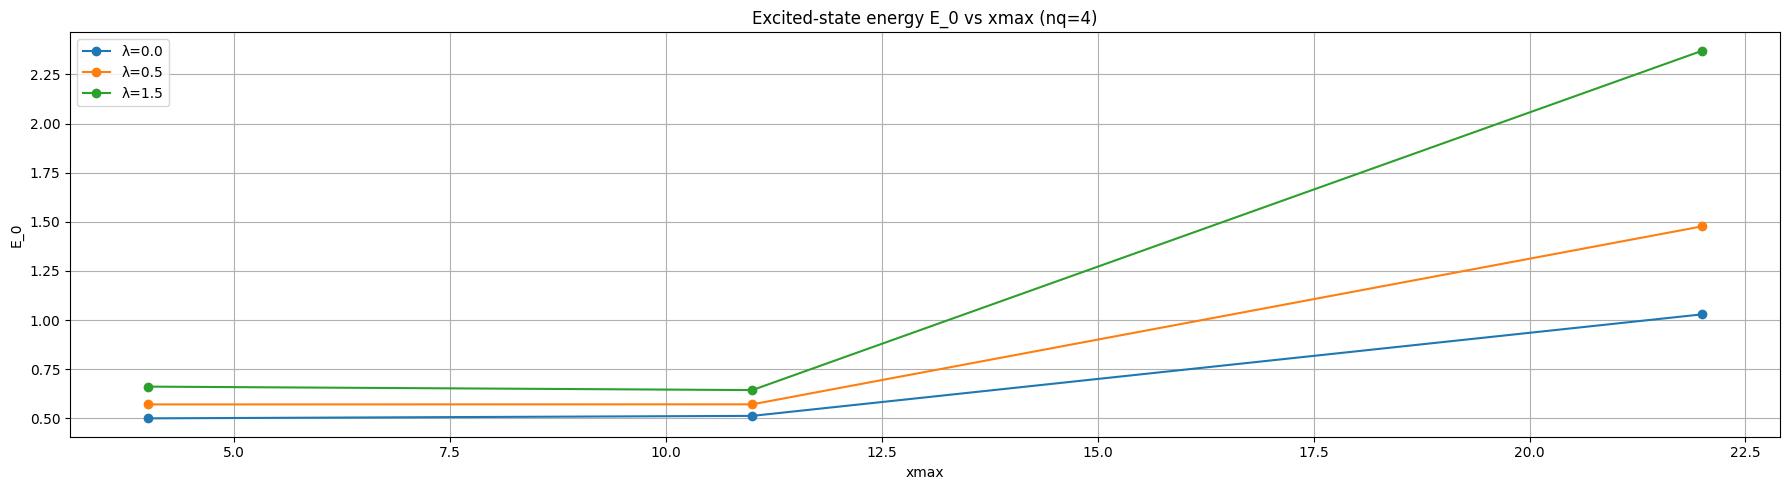

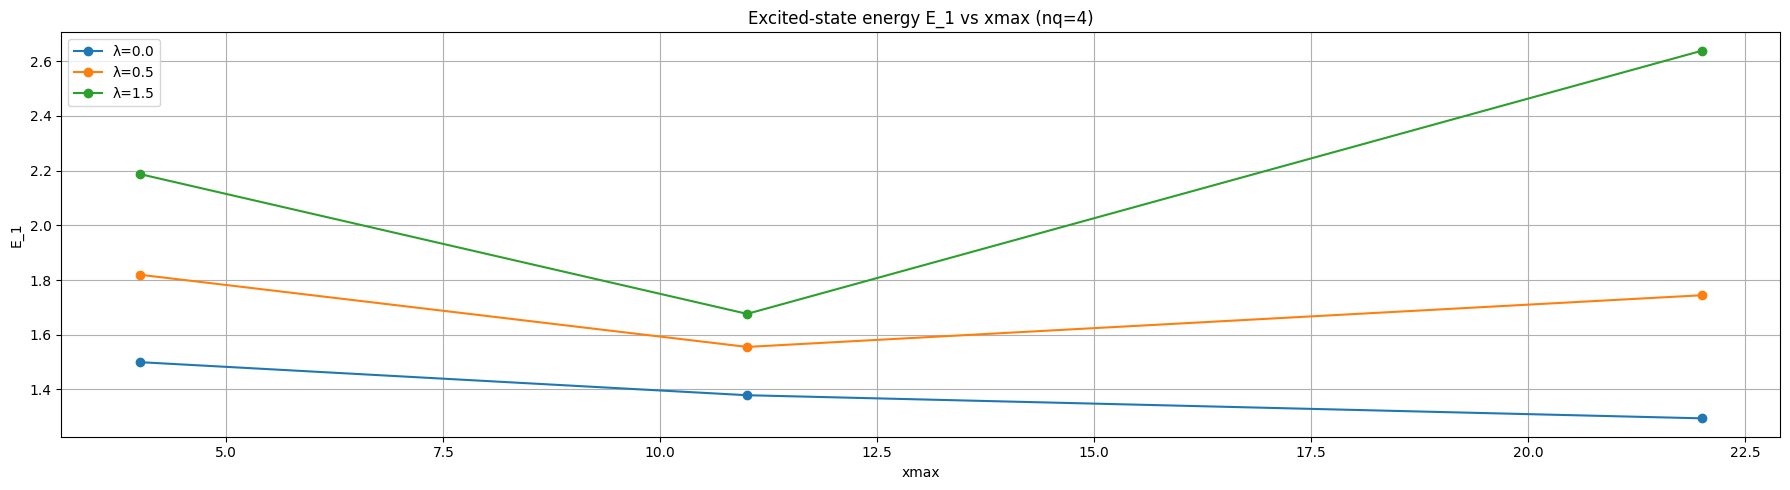

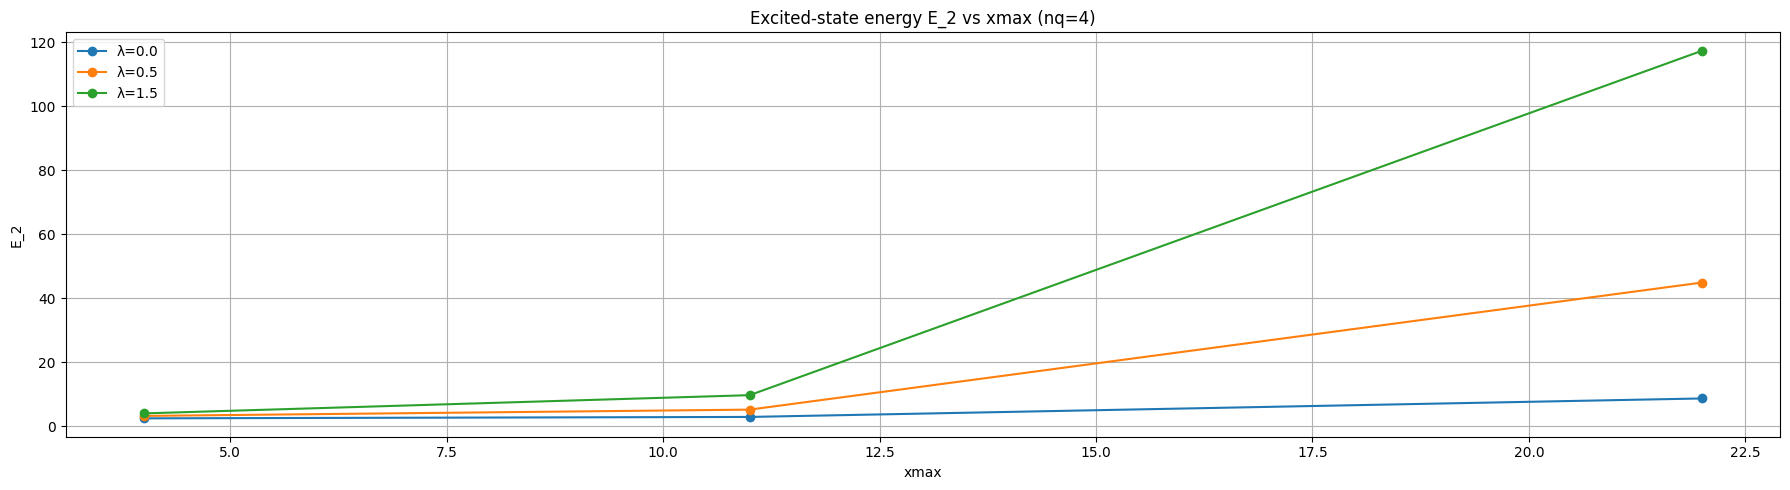

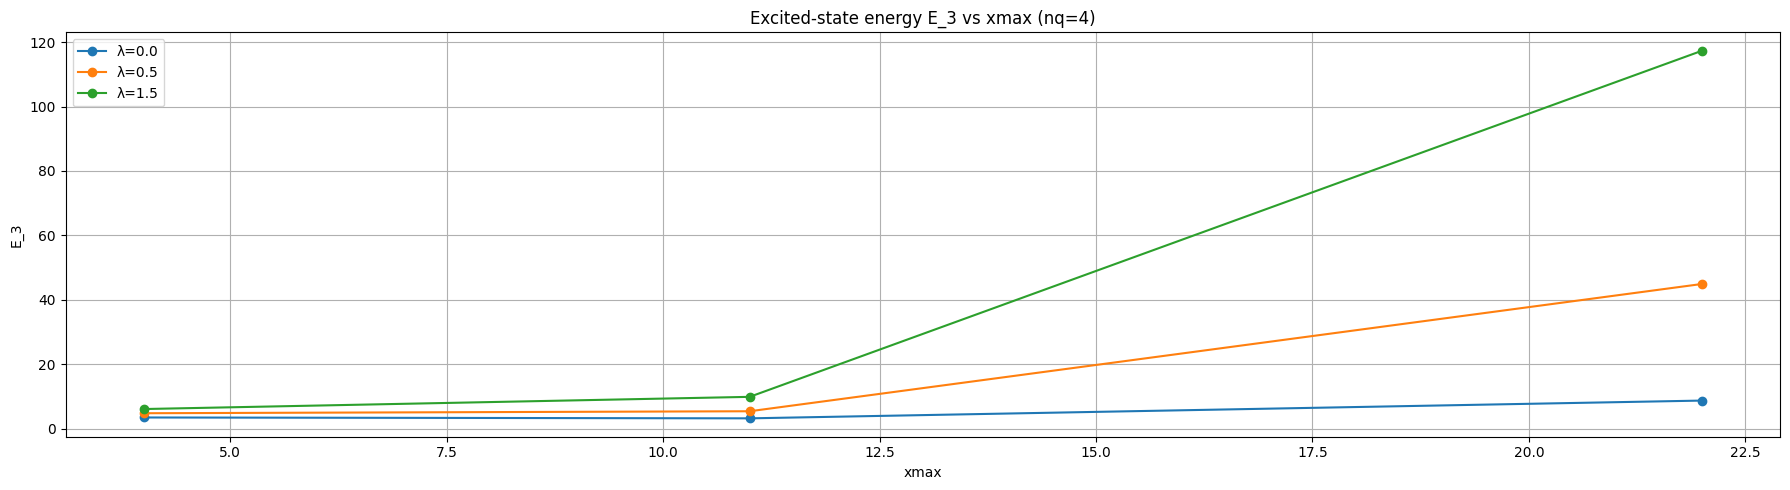

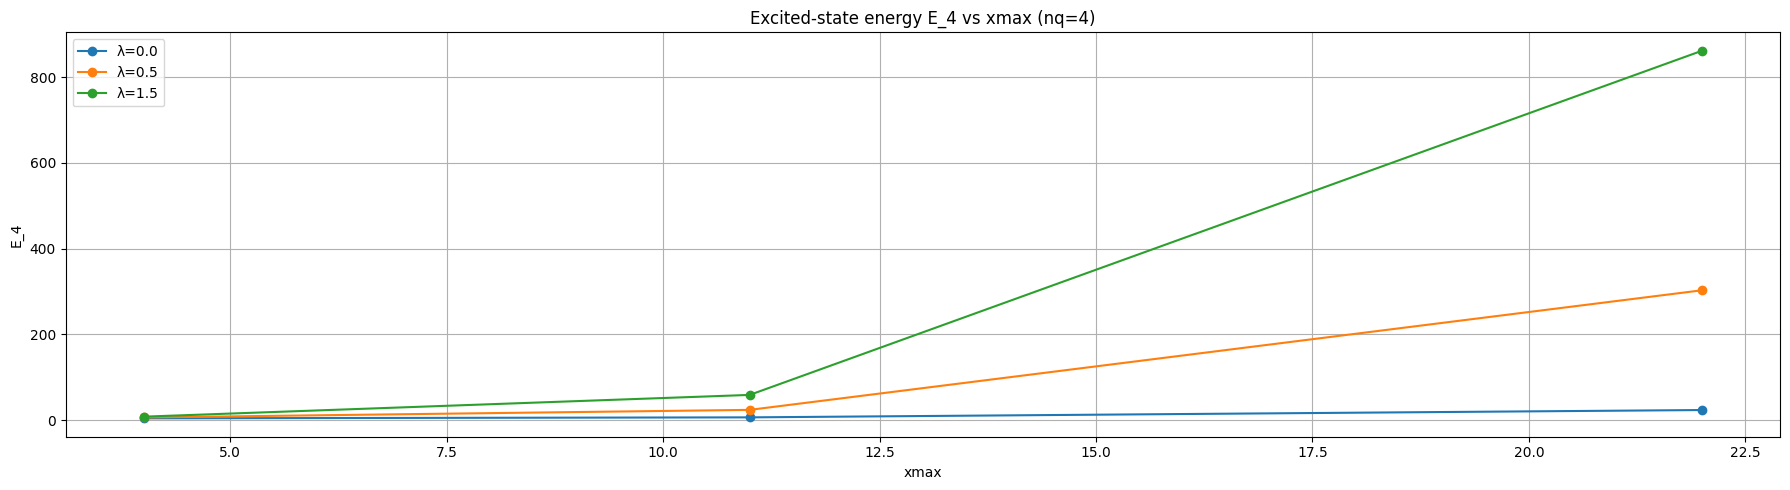

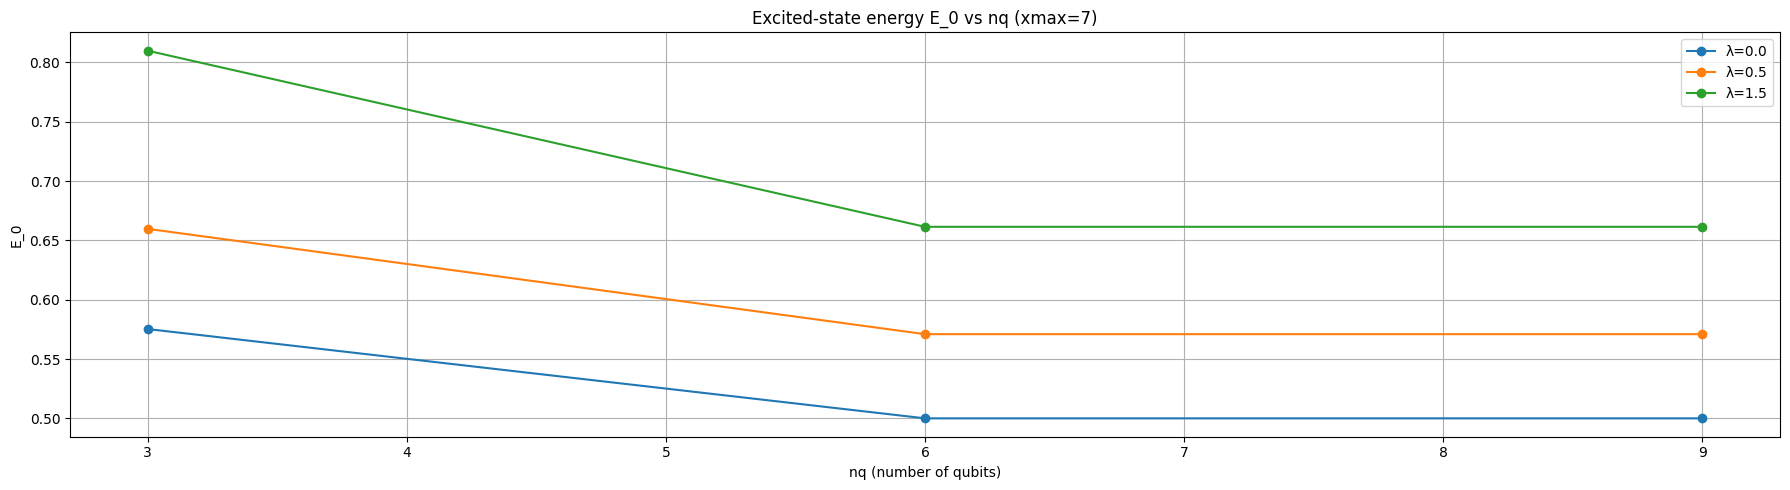

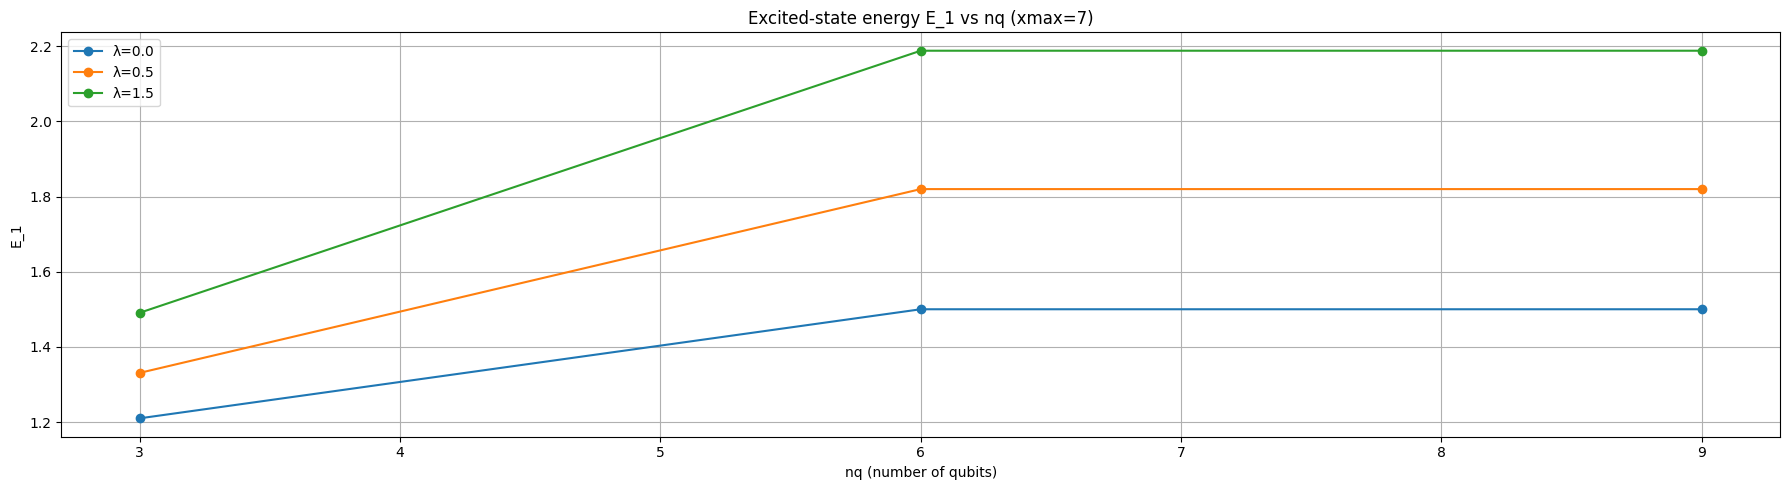

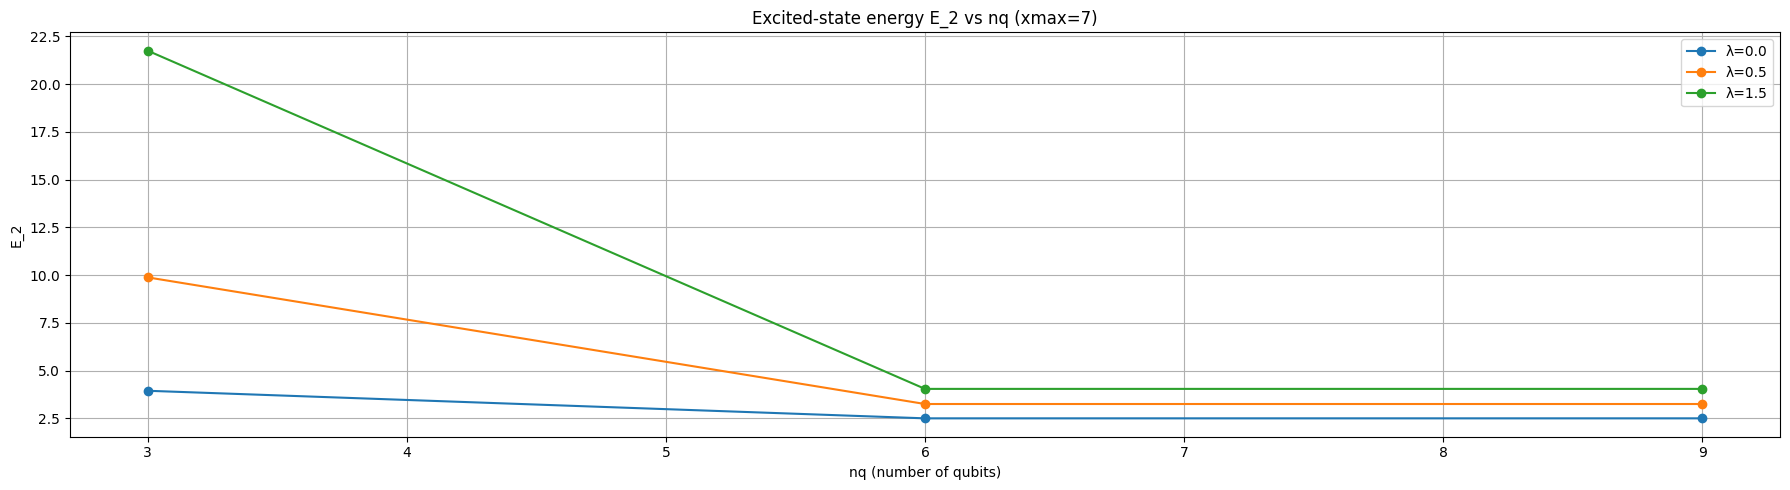

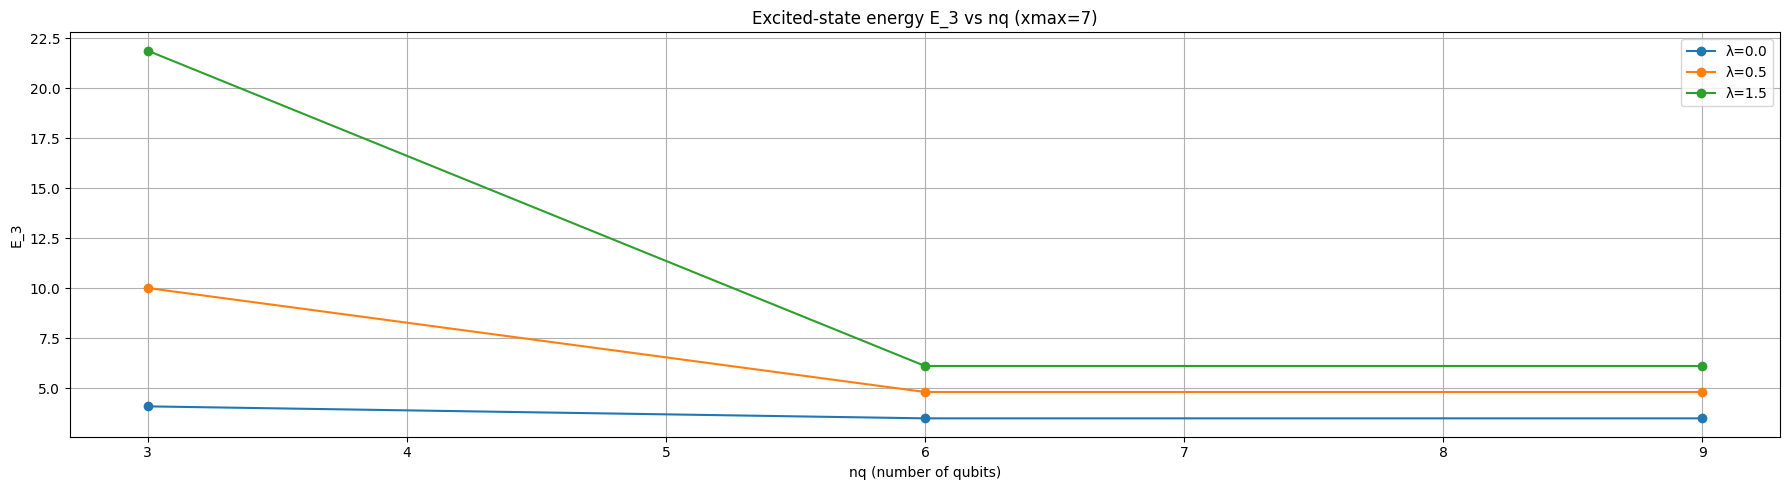

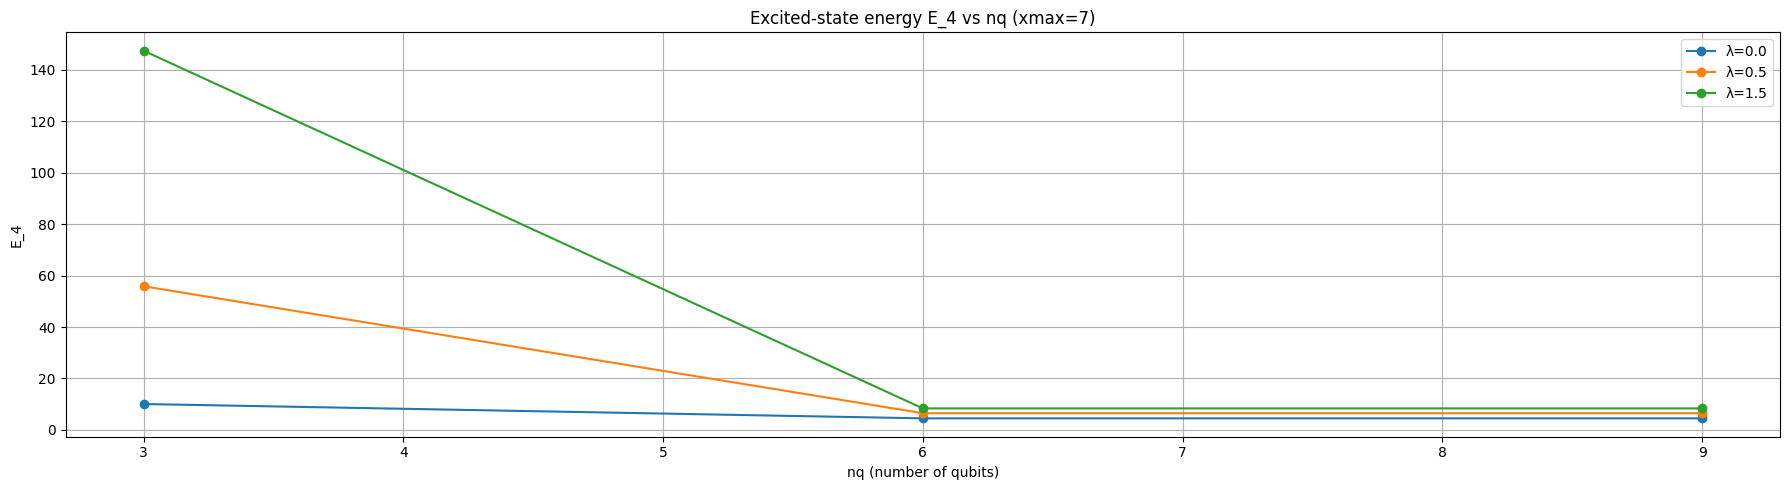

In [18]:
# ==============================================
# Excited-state energy convergence (k = 0..4)
# ==============================================
import numpy as np
import matplotlib.pyplot as plt


def plot_excited_energy_convergence(ks=range(5), lam_list=(0.0, 0.5, 1.5),
                                    xmax_values=(4, 11, 22), nq_values=(3, 6, 9),
                                    xmax_for_nq=7, nq_for_xmax=4):
    """
    Produce convergence plots for E_k (k in ks) across λ in two sweeps:
      1) Vary xmax at fixed nq (nq_for_xmax), using xmax_values
      2) Vary nq at fixed xmax (xmax_for_nq), using nq_values
    Each figure shows three curves (one per λ) for a specific k.
    """
    ks = list(ks)
    lam_list = list(lam_list)

    # 1) E_k vs xmax at fixed nq
    for k in ks:
        plt.figure(figsize=(18, 5))
        for lam in lam_list:
            y = []
            for xmax in xmax_values:
                H, _, _ = build_hamiltonian(nq_for_xmax, xmax, lam)
                evals, _ = exact_spectrum(H, nev=max(6, k+2))
                y.append(evals[k])
            plt.plot(list(xmax_values), y, marker='o', label=f"λ={lam}")
        plt.xlabel('xmax')
        plt.ylabel(f'E_{k}')
        plt.title(f'Excited-state energy E_{k} vs xmax (nq={nq_for_xmax})')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    # 2) E_k vs nq at fixed xmax
    for k in ks:
        plt.figure(figsize=(18, 5))
        for lam in lam_list:
            y = []
            for nq in nq_values:
                H, _, _ = build_hamiltonian(nq, xmax_for_nq, lam)
                evals, _ = exact_spectrum(H, nev=max(6, k+2))
                y.append(evals[k])
            plt.plot(list(nq_values), y, marker='o', label=f"λ={lam}")
        plt.xlabel('nq (number of qubits)')
        plt.ylabel(f'E_{k}')
        plt.title(f'Excited-state energy E_{k} vs nq (xmax={xmax_for_nq})')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Quick run with modest sweeps for responsiveness
plot_excited_energy_convergence(
    ks=range(5),
    lam_list=[0.0, 0.5, 1.5],
    xmax_values=[4, 11, 22],
    nq_values=[3, 6, 9],
    xmax_for_nq=7,
    nq_for_xmax=4,
)


In [22]:
# Save excited-state energy convergence figures for k=1..4 to match Report.tex placeholders
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Ensure output directory exists
os.makedirs('figures', exist_ok=True)

# Use existing globals if present; else set reasonable defaults
try:
    lam_values = lam_list
except NameError:
    lam_values = [0.0, 0.5, 1.5]

try:
    xmax_values = xmax_list
except NameError:
    xmax_values = [4, 11, 22]

try:
    nq_values = nq_list
except NameError:
    nq_values = [3, 6, 9]

try:
    nq_fixed = fixed_nq
except NameError:
    nq_fixed = 4

try:
    xmax_fixed = fixed_xmax
except NameError:
    xmax_fixed = 7

# Helper: compute kth eigenvalue for given (nq, xmax, lam)
def compute_e_k(k, nq, xmax, lam):
    H, x, dx = build_hamiltonian(nq=nq, xmax=xmax, lam=lam)
    w, _ = eigh(H)
    if k < len(w):
        return float(w[k])
    else:
        return np.nan

# Generate and save plots
for k in [1, 2, 3, 4]:
    # E_k vs xmax at fixed nq
    plt.figure(figsize=(6, 4))
    for lam in lam_values:
        energies = [compute_e_k(k, nq_fixed, xmax, lam) for xmax in xmax_values]
        plt.plot(xmax_values, energies, marker='o', label=rf"$\lambda={lam}$")
    plt.xlabel(r"$x_{\max}$")
    plt.ylabel(r"$E_{" + str(k) + r"}$")
    title_text = r"$E_{" + str(k) + r"}$ vs $x_{\max}$ at fixed $n_q=" + str(nq_fixed) + r"$"
    plt.title(title_text)
    plt.legend()
    plt.grid(True, alpha=0.3)
    out_path = f"figures/energy_E{k}_vs_xmax_nq{nq_fixed}.png"
    plt.tight_layout()
    plt.savefig(out_path, dpi=200)
    plt.close()

    # E_k vs nq at fixed xmax
    plt.figure(figsize=(6, 4))
    for lam in lam_values:
        energies = [compute_e_k(k, nq, xmax_fixed, lam) for nq in nq_values]
        plt.plot(nq_values, energies, marker='o', label=rf"$\lambda={lam}$")
    plt.xlabel(r"$n_q$")
    plt.ylabel(r"$E_{" + str(k) + r"}$")
    title_text = r"$E_{" + str(k) + r"}$ vs $n_q$ at fixed $x_{\max}=" + str(xmax_fixed) + r"$"
    plt.title(title_text)
    plt.legend()
    plt.grid(True, alpha=0.3)
    out_path = f"figures/energy_E{k}_vs_nq_x{xmax_fixed}.png"
    plt.tight_layout()
    plt.savefig(out_path, dpi=200)
    plt.close()

print("Saved excited-state energy figures for k=1..4 in ./figures/")

Saved excited-state energy figures for k=1..4 in ./figures/


# AI Acknowledgment


This Jupyter Notebook (Assignment3.ipynb) and the corresponding LaTeX report were collaboratively created with the assistance of AI tools.



**ChatGPT (OpenAI GPT-5) Contribution:**


- Explaining the theoretical basis of the Jordan–Lee–Preskill (JLP) encoding and its role in discretizing the field operators.

- Designing and writing the full Python implementation of the JLP Hamiltonian builder, eigenvalue solver, and plotting functions for eigenvalue and wavefunction convergence.

- Refining the code structure for clarity, adding comments, and improving readability.

- Generating LaTeX sections for the report including: methodology, results, discussion, and conclusions for Question 1 of the assignment.

- Creating templates for plots of $E_k$ versus $x_{\max}$ and $n_q$, and verifying convergence trends.

- Writing this acknowledgment prompt and suggesting Copilot’s addition.



**GitHub Copilot Contribution:**


- Inline code completion and syntax suggestions within VS Code during the refinement of the Python code in Assignment3.ipynb.

- Auto-formatting, optimizing import structures, and suggesting LaTeX syntax improvements in the report file.

- Generating repetitive boilerplate (e.g., plotting loops, function docstrings, and figure captions).

- Minor fixes in variable naming and consistency across cells in the notebook.



Together, ChatGPT and Copilot streamlined the workflow by combining conceptual explanations, functional code generation, and technical writing support for the report and code documentation.



(Please retain this acknowledgment in your submitted LaTeX report under an “AI Assistance” section.)